# Machine Learning

If you took Algebra 1 in school, you've already done some machine learning. Though the term "machine learning" might make you think of tools like GPT-4 and DALL-E that were built by huge teams of skilled programmers, there are lots of simple and highly effective approaches that fall under the machine learning umbrella. Some, like linear regression, are probably already familiar to you. Others are definitely more obscure. But the simplest machine learning approaches (some of which we will learn about this week) are, perhaps surprisingly, often the most useful.

Along with covering a handful of specific machine learning techniques, we will also learn some general principles of machine learning—from common pitfalls to an algorithm that you can use to solve a wide range of machine learning problems. 

:::{admonition} Learning Goals
:class: important
By the end of this week, you should be able to:
* Identify the essential components of any machine learning approach, like the model and the loss function
* Describe the criteria for choosing an appropriate machine learning approach for a given problem
* Use linear algebra to solve a linear regression problem
* Articulate the bias/variance tradeoff and use it to explain how regularization helps to prevent overfitting
* Explain how gradient descent works and implement it in Python
:::

(basics-ml)=
## The Basics of Machine Learning

Here are a few problems you might solve with machine learning:
* Figure out how to predict someone's height based off of their age
* Using a bunch of data about the Stanford student body, find the groups of students who are most similar to one another
* Automatically label images with text describing their contents

These problems run the gamut from extremely easy to extremely difficult. But they all count as machine learning problems. Put as simply as possible, machine learning means using a computer to find patterns in data. Straightforward enough, right?

In a sense, it really is that straightforward! Did you ever use a graphic calculator to find the line (or perhaps quadratic) of best fit for some set of ordered pairs? Then you've done machine learning. 

The key is that you don't give the computer the solution ahead of time. In the case of linear regression, you don't figure out the slope and y-intercept yourself and then tell the computer to plot the line or to use it to make a prediction—the computer has to *learn* those values itself.

Even so, machine learning remains a surprisingly general term. To get a handle on it, we can break it down into its two major categories: supervised learning and unsupervised learning.

### Supervised Learning

In supervised learning, your data are divided into two portions, both of which go by many names: the **features/regressors/predictors/independent variables**, and the **label/dependent variable/outcome variable**. You may notice that the features are plural, whereas the outcome is singular. That's because we might use many different features—say, zip code, square footage, year of construction—to predict a single outcome variable—here, the price at which a house sells. In neuroscience, your predictors might be, say, fMRI measurements of brain activities in a handful of different regions, and your outcome variable could be the stimulus that your subject is viewing at that point in time. We will often express the $i$ different predictors as vectors $\textbf{x}_i,$ and your outcome variable as a single vector $\textbf{y}.$
:::{admonition} Definition
:class: note
The ***features*** or ***predictors*** in a machine learning problem are the variables that will be known in the final application of your trained model. The ***label*** or ***dependent variable*** is the variable that will not be known, and that you are training the model to be able to predict using the features.
:::

:::{admonition} Exercise 
:class: note
Tools like GPT work by using the $n$ previous words to predict the best possible next word. What are the features for GPT? What's the outcome variable?
:::{admonition} Solution
:class: seealso, dropdown
GPT uses $n$ features—each of the $n$ previous words is a feature. The outcome variable is the next word.
:::

If you have both features and a label/outcome variable, you are doing supervised learning. The outcome variable is where the term **supervised** comes from. The idea is that you are trying to train your system to do something specific: for each set of values for the feature values in your dataset, you want it to learn to predict a particular value of the outcome variable. You're using pairs of input and outputs to train an input-output machine, and you are *supervising* that training to ensure the machine learns to output the right thing.

But features and outcome variables aren't the only way that the data get sliced up in a supervised learning problem. Equally important are the **training set** and the **test set**. To ensure that your model, once trained, works, you'll have to present it with some instances of your features that it has never seen before—but where you know what the associated outcome variable should be. Then, you can assess the model's performance by comparing its prediction to the true value of the outcome variable. This means that, before you start training your model at all, you have to hold a portion of your data aside to be ultimately used in testing. (This can pose problems when you only have a small amount of data, and we'll address how to deal with that later in this lesson.)


```{figure} ./figs/mldata.png
---
height: 400px
name: mldata
---
<i>: A summary of how a full dataset is divided up for a supervised learning problem.</i>
```

So let's apply this all this terminology to a problem that you might be familiar with: using a specific type of deep neural network called a **convolutional neural network** to label images. 

```{figure} ./figs/cnn.jpeg
---
height: 300px
name: fig1
---
```
The first several layers of the network on the left might not look much like the neural networks we saw in Week 2 to you—but that's just because the way they are drawn is meant to illustrate an important feature of convolutional neural networks. In the convolutional layers of a CNN, each neuron only receives inputs from a small fraction of the neurons on the previous layer.

But let's think of the problem here in terms of what we've learned so far. The *features*, in this case, are just the individual pixels of the image, each of which gives a small bit of into about the image's identity (at least when considered in the context of the rest of the pixels). The outcome variable is the label—"car," "truck", etc. To get this model to work, you'd have to train it on a bunch of pairs of images and labels—your training set—and then feed in some unseen images to see if the model labeled them correctly—your test set.

### Unsupervised Learning

We're going to spend almost all of our time this week talking about supervised learning. But it's important to address unsupervised learning as well. Unsupervised learning isn't typically what comes to mind when you think of machine learning, but it's an equally important approach. And—surprise!—you learned one approach to it last week!

In unsupervised learning you **only have feature variables**. There is no outcome variable! So, you can't train the model to predict anything specific from particular values of the feature variables. Instead, your model will have to uncover intrinsic structure within the features themselves.

Thos might sound a bit abstract, so let's make it concrete. Let's say you collect a bunch of data about different people's pets: size, diet, how expensive they are to maintain, etc. But you never recorded the species. If you feed all that data to an unsupervised learning model, it will be able to learn that there are certain patterns in those data: a set of small and fairly inexpensive animals (rodents), some large and expensive animals (dogs), some small animals that eat seeds (birds). Sure, the algorithm might misclassify some small dogs as cats. But it will still be able to 

The process above is called **clustering**, and it's probably the most popular unsupervised learning approach. In a clustering problem, you have a bunch of data, and you want to figure out what the underlying groups in the data are and which observations belong to which groups. In neuroscience, clustering could be used to help you identify different cell types in a big set of electrophysiological recordings, when you don't actually know which neurons are the same type ahead of time.

```{figure} ./figs/clustering.png
---
height: 400px
---
<i>: What clustering might look like. Notice that it's not always necessarily obvious whether a group of data should be identified as a single cluster or two different clusters!</i>
```

We're not going to explicitly cover how clustering works in this class, but if you ever need to perform it, you'll probably use the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/clustering.html) module in scikit-learn. But you've actually already learned an unsupervised learning approach: PCA! PCA takes a bunch of data, without any explicit labels, and figures out how to capture as much of the variance in those data as possible using as few dimensions as possible. When PCA finds those optimal dimensions, the principal components, that's a form of machine learning.

:::{admonition} Exercise
Go back to the three machine learning problems at the {ref}`start of this section<basics-ml>`. Which ones involve supervised learning? Which involve unsupervised learning?
:::{admonition} Solution
:class: seealso, dropdown
* Figure out how to predict someone's height based off of their age—**supervised**
* Using a bunch of data about the Stanford student body, find the groups of students who are most similar to one another—**unsupervised**
* Automatically label images with text describing their contents—**supervised**
:::

### The Model and the Loss Function

So we now what data to use to train a machine learning model, whether supervised or unsupervised. But how do the models themselves work? There's obviously a lot of variation here, but every single machine learning approach we will cover has at least two major components: the **model** itself, and the **loss function.**

The model is essentiall the **basic structure** of our approach. It might include some fixed components as well as some **parameters**, which will change over the course of the learning process to improve the model's performance. In a [deep neural network](fig1), for example, the network itself is the model. The parameters are the connection weights among the different neurons, since those are the values that will change over the course of training and allow the model to fit to the data you provide. However, other attributes of the model—the number of layers, for example—are **not** parameters, since they remain fixed throughout training.
:::{admonition} Definition
:class: note
The ***parameters*** of a machine learning model are the variables in the model whose values change over the course of training.
:::
But the model itself is not enough. As the programmer, you have to tell the model *how* to learn. That's where the loss function (or "objective function") comes in. The loss function acts kind of like a (rather cruel) trainer who punishes an animal's mistakes. The animal learns to change its behavior to minimize punishment—its **loss function**. 

:::{admonition} Definition
:class: note
The ***loss function*** or ***objective function*** of a machine learning model is a function that guides how the model learns. In the supervised case, it is defined over the model's predictions and the true values of the outcome variable. The goal of the machine learning algorithm is to *minimize* the loss function by changing the parameters appropriately.
:::

Some loss functions are extremely straightforward. For the image classification network, for example, the loss function should just assign a score of 1 every time the network gets the label wrong and 0 every time the network gets the label right. That way, minimizing the loss function will be the same as getting every label right. But sometimes loss functions can be a touch more complicated, and small tweaks the loss function can change really important features of the trained model. That's going to be the case with linear regression, which we will discuss next.

:::{admonition} Exercise 
:class: note 
What is the loss function for PCA?
:::{admonition} Solution
:class: seealso, dropdown
The loss function is the negative variance explained: we want to explain as much of the variance as possible.
:::

## Linear Regression

When you first learned about linear regression, the problem was probably posed like this: We have a bunch of data in the form of $(x,y)$ coordinates, and we want to find the line that comes closest to going through all those points. Or you might have been given a plot like this:
```{figure} ./figs/figure\ 21.png
---
height: 400px
name: dataplot
---
```
and asked to find the best-fit line. Your goal would have been to find $m$ and $b$ such that 
:::{math}
y = mx + b
:::
came as close to all of these points as possible. In linear regression, "as close as possible" means "minimize the total distance between the points and the line," which we define as the **sum of squared residuals** (or errors).
```{figure} ./figs/residual.png
---
height: 200px
---
```
This definition of residual should make sense. $x$ is our independent variable—the thing we know—and $y$ is our dependent variable, the thing we are trying to predict. In the above example, we are trying to predict height based on age. So the residual is just the difference between our predicted $y$—which we often write as $\hat{y}$—and the true $y$. It's the error in our prediction.

:::{admonition} Exercise 
:class: note 
What is the model in linear regression? What is the loss function?
:::{admonition} Solution
:class: seealso, dropdown
The model for linear regression is just the linear equation $y = mx + b$. The loss function is the sum of the squared errors.
:::

Hopefully, none of this is terribly new to you. What might be new, though, is using linear algebra to solve this problem. That's what we're going to learn to do here.

So let's say we're given the [data above](dataplot). How do we start thinking about the problem? Let's say these are measurements from some experiment, in which $x$ is the independent variable—say, hours of sleep someone had the previous night—and $y$ is the dependent variable—say, number of math questions answered correctly. We want to find values $\beta_0$ and $\beta_1$ so that the equation
:::{math}
	y = \beta_0 + \beta_1 x
:::
fits the data as well as possible. (You'll see in a bit why we use $\beta$ here instead of $m$ and $b$—it comes in handy when we start adding more coefficients.) 

If we write our $x$ observations as $(x_1, \dots, x_{10})$ and our $y$ observations as $(y_1, \dots, y_{10})$, then we can write
:::{math}
:label: eq51
	y_i =\hat{\beta}_0 + \hat{\beta}_1x_i + \epsilon_i
:::
Remember, the $\hat{~}$ indicates that we are dealing with an estimate or prediction based on the data, instead of some "true" value. So the $\hat{\beta}_0$ and $\hat{\beta}_1$ are our best guesses for the $\beta$ values based on the data we have. In other words, $\hat{\beta}_0$ and $\hat{\beta}_1$ define our best fit line.

:::{admonition} Exercise 
:class: note 
If $\hat{\beta}_0$ and $\hat{\beta}_1$ define our line of best fit, what is $\epsilon_i$? 
:::{admonition} Solution
:class: seealso, dropdown
$\epsilon_i$ is the residual associated with our $i^{\text{th}}$ data point. To see this, realize that $\hat{\beta}_0 + \hat{\beta}_1x_i$ is just $\hat{y}_i$—our best guess for $y_i$ based on the best fit line. Then we can see
:::{math}
	\epsilon_i &= y_i - \hat{\beta}_0 - \hat{\beta}_1x_i \\
    &= y_i - \hat{y}_i
:::


Since the $\epsilon_i$ are our residuals, our sum of squared residuals—that is, our loss function—is just
:::{math}
\text{SSR} &= \sum_i \epsilon_i^2 \\
&= \sum_i(y_i - \hat{\beta}_0 - \hat{\beta}_1x_i)^2
:::
But now that we know linear algebra, we have the tools that we need to convert annoying sums like that turn into much nicer matrix equations. Let's figure out how to do that—by first writing out all the relevant equations individually, and then converting them into a single matrix equation.

Our [dataset](dataplot) contains 10 ordered pairs $(x_i, y_i)$, so we can write 10 equations:
:::{math}
:label: eq52
	y_1 &= \hat{\beta}_0 + \hat{\beta}_1x_1 + \epsilon_1\\
	y_2 &= \hat{\beta}_0 + \hat{\beta}_1x_2 + \epsilon_2\\
	&\vdots\\
	y_{10} &= \hat{\beta}_0 + \hat{\beta}_1x_{10}+ \epsilon_{10}
:::
We can put these in matrix form pretty easily!
:::{math}
	\mathbf{y} = \mathbf{X}\hat{\boldsymbol\beta} + \boldsymbol\epsilon
:::
where
:::{math}
	\mathbf{y} &= \left[\begin{matrix} y_1 \\ y_2 \\ \vdots \\ y_{10} \end{matrix}\right]\\
    \mathbf{X} &=  \left[\begin{matrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\1 & x_{10} \end{matrix}\right]\\   \hat{\boldsymbol\beta} &= \left[\begin{matrix} \hat{\beta_0} \\ \hat{\beta_1} \end{matrix}\right] \\ \boldsymbol\epsilon &= \left[\begin{matrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_{10} \end{matrix}\right] 
:::
We call the matrix $\textbf{X}$ the **design matrix**. 
:::{admonition} Definition
:class: note
A ***design matrix*** is a matrix whose columns are the independent variables or ***regressors*** in a linear regression problem.
:::
:::{admonition} Exercise 
:class: note 
:name: ones
Why does our design matrix $\textbf{X}$ include a column of ones?
:::{admonition} Solution
:class: seealso, dropdown
The ones are needed to include the $y$-intercept, $\beta_0$, in the regression. When carrying out the matrix multiplication of $\textbf{X}$ and $\hat{\boldsymbol\beta},$ all the ones will be multiplied by $\hat{\beta}_0,$ yielding the $\hat{\beta}_0$ term that appears in each of our scalar equations {eq}`eq52`.
:::
Okay, so how do we get the sum of squared residuals here? Well, that's just every element of the vector $\boldsymbol\epsilon$ squared and then added together—or, the dot product of the vector with itself! Remember, we can just write that as $\boldsymbol\epsilon^{\intercal}\boldsymbol\epsilon$—matrix multiplication of the row version of a vector by the column version is exactly the same as the dot product. Now, using our equation above, we can write
:::{math}
	\boldsymbol\epsilon^{\intercal}\boldsymbol\epsilon = (\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta})^{\intercal}(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta})
:::
Remember, we want to \textit{minimize} this quantity. And how do we minimize things? We take their derivatives and set them to zero! In particular, since we are ultimately trying to solve for $\hat{\boldsymbol\beta}$, we should take the derivative with respect to $\hat{\boldsymbol\beta}$.
:::{warning}
Don't worry too much about the details of the matrix calculus here—you won't be responsible for it in this course. 
:::
So let's mimize our sum of squared residuals, using linear algebra.
:::{math}
	0 &= \frac{d}{d\hat{\boldsymbol\beta}}\left[(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta})^{\intercal}(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta})\right]\\
    &= \frac{d}{d\hat{\boldsymbol\beta}}\left[(\mathbf{y}^{\intercal} - \hat{\boldsymbol\beta}^{\intercal}\mathbf{X}^{\intercal})(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta})\right]\\
	&=  \frac{d}{d\hat{\boldsymbol\beta}}\left[ \mathbf{y}^{\intercal}\mathbf{y} - \mathbf{y}^{\intercal} \mathbf{X}\hat{\boldsymbol\beta} - \hat{\boldsymbol\beta}^{\intercal}\mathbf{X}^{\intercal}\mathbf{y} + \hat{\boldsymbol\beta}^{\intercal}\mathbf{X}^{\intercal}\mathbf{X}\hat{\boldsymbol\beta} \right]\\
	&= -2\mathbf{X}^{\intercal}\mathbf{y}  + 2\mathbf{X}^{\intercal}\mathbf{X}\hat{\boldsymbol\beta} \\
	\mathbf{X}^{\intercal}\mathbf{X}\hat{\boldsymbol\beta} &= \mathbf{X}^{\intercal}\mathbf{y}
:::

:::{note}
Eagle-eyed readers may notice that I used the fact that $(AB)^{\intercal} = B^{\intercal}A^{\intercal}.$ That's a useful identity to have in your back pocket!
:::

What do we do here? If this equation were a scalar equation, we could just divide both sides by $\mathbf{X}^{\intercal}\mathbf{X}.$ But we don't have anything called matrix division. Instead we have to use the matrix inverse. Remember, for a given matrix $\mathbf{A}$, the inverse matrix $\mathbf{A}^{-1}$ is defined such that
:::{math}
	\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}
:::
where $\mathbf{I}$ is the identity matrix. So what we need to do here is multiply both sides of the equation by $(\mathbf{X}^{\intercal}\mathbf{X})^{-1}.$ If we do that, we obtain:
:::{math}
	(\mathbf{X}^{\intercal}\mathbf{X})^{-1}	\mathbf{X}^{\intercal}\mathbf{X}\hat{\boldsymbol\beta} &= 	(\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y}\\
	\mathbf{I}\hat{\boldsymbol\beta} &= 	(\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y}\\
	\hat{\boldsymbol\beta} &=	(\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y}
:::

This final equation, $\hat{\boldsymbol\beta} =	(\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y}$, is incredibly important and incredibly general. It is known as the **normal equation**.
:::{admonition} Definition
:class: note
:name: normeq
The ***normal equation***, $\hat{\boldsymbol\beta} =	(\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y}$, is the least squares solution to a linear regression problem with design matrix $\mathbf{X}$ and dependent or outcome variable $\mathbf{y}.$
:::

### Worked Example
Let's practice using the normal equation, using the data from the [plot](dataplot) above. 
|  x  |  y  |
| :---: | :---: |
|  1  |  1  |
|  1  |  2  |
|  3  |  2  |
|  5  |  3  |
|  6  |  6  |
|  7  |  8  |
|  7  |  9  |
|  8  |  8  |
|  9  |  8  |
|  9  |  9  |

:::{admonition} Exercise 
:class: note 
Write the design matrix $\textbf{X}$ for a linear regression on this dataset.
:::{admonition} Solution
:class: seealso, dropdown
We have two regressors here—the {ref}`column of ones<ones>` included in every design matrix for the $y$-intercept, and the $x$ values in the table above. So our matrix should have two columns. It looks like this:
:::{math}
\textbf{X} = \left[\begin{matrix}1 & 1\\1 & 1\\1 & 3\\1 & 5\\1&6\\1&7\\1&7\\1&8\\1&9\\1&9\end{matrix}\right]
:::
Let's write out our matrix regression equation:
:::{math}
\textbf{y} &= \textbf{X}\hat{\boldsymbol\beta} + \boldsymbol\epsilon\\
	\left[\begin{matrix}1  \\2\\2\\3\\6\\8\\9\\8\\8\\9 \end{matrix}\right] &= \left[\begin{matrix}1 & 1\\1 & 1\\1 & 3\\1 & 5\\1&6\\1&7\\1&7\\1&8\\1&9\\1&9\end{matrix}\right]\left[\begin{matrix}\hat{\beta}_0\\ \hat{\beta}_1 \end{matrix}\right] + \boldsymbol\epsilon
:::

How do we solve for $\hat{\boldsymbol\beta}$? Use our {ref}`normal equation<normeq>`, of course!
:::{math}
	\hat{\boldsymbol\beta} = (\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y}
:::
Let's start by finding $\mathbf{X}^{\intercal}\mathbf{X}$:
:::{math}
	 \mathbf{X}^{\intercal}\mathbf{X} &= \left[\begin{matrix} 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 3 & 5 & 6 & 7 & 7 & 8 & 9 & 9 \end{matrix}\right] \left[\begin{matrix}1 & 1\\1 & 1\\1 & 3\\1 & 5\\1&6\\1&7\\1&7\\1&8\\1&9\\1&9\end{matrix}\right]\\
	 &=\left[ \begin{matrix}
	 	10 & 56 \\ 56 & 396 
	 \end{matrix}\right]
:::
This is a $2\times2$ matrix, so we know how to invert it!
:::{math}
	( \mathbf{X}^{\intercal}\mathbf{X})^{-1} &= \frac{1}{824}\left[ \begin{matrix}
		396 & -56 \\ -56 & 10
	\end{matrix}\right]
:::
Next, let's calculate $\mathbf{X}^{\intercal}\mathbf{y}$:
:::{math}
	\mathbf{X}^{\intercal}\mathbf{y} &= \left[\begin{matrix} 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 3 & 5 & 6 & 7 & 7 & 8 & 9 & 9 \end{matrix}\right]  	\left[\begin{matrix}1  \\2\\2\\3\\6\\8\\9\\8\\8\\9 \end{matrix}\right] \\
	&= \left[\begin{matrix} 56 \\ 396 \end{matrix}\right]
:::
So, we have
:::{math}
	\hat{\boldsymbol\beta} &=  (\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y} \\
	&=  \frac{1}{824}\left[ \begin{matrix}
		396 & -56 \\ -56 & 10
	\end{matrix}\right]\left[\begin{matrix} 56 \\ 396 \end{matrix}\right]\\
&= \frac{1}{824}\left[ \begin{matrix}0 \\ 824 \end{matrix}\right]\\
&= \left[ \begin{matrix} 0 \\ 1 \end{matrix}\right]
:::
Thus we find that $\hat{\beta}_0 = 0 $ and $\hat{\beta}_1 = 1.$ Therefore, our line of best fit is $y = x.$
```{figure} ./figs/figure\ 22.png
---
height: 400px
---
```

You won't really ever have to carry out linear regression like this by hand—as you can see, it gets kind of messy. But hopefully you've seen from this example that the normal equation really does work—that, just by using matrix algebra, we can neatly solve linear regression problems. 

For practical purposes, though, you'll use a Python library called `scikit-learn`. In particular, to do linear regression, you'll use the class [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Here's an example of how it works:

```{figure} ./figs/whitesquare.png
---
height: 1px
name: square
---
```

[[1.78513081 0.65728992]]


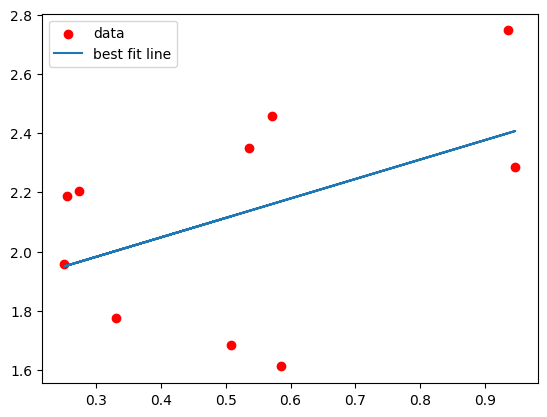

In [1]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
X = np.random.rand(10,2)
X[:,0] = 1 #setting the first column of the design matrix to 1
y = np.random.rand(10,1) + np.matmul(X,np.array([[1],[1]])) #generating y by calculating 1 + x, plus some random error
model = LinearRegression(fit_intercept=False) #since I already accounted for the intercept in my design matrix
model.fit(X,y) #this is where the regression happens!
print(model.coef_)
y_hat = np.matmul(X,np.reshape(model.coef_,(2,1))) #calculating my predictions for y based on X and my fit betas
plt.scatter(X[:,1],y,c='r',label="data")
plt.plot(X[:,1],y_hat,label="best fit line")
plt.legend()

### Multiple Linear Regression
You're running an fMRI experiment where you have your subjects look at a bunch of different stimuli—faces, buildings, food, animals—and you're trying to find a brain region that responds specifically to faces. It might not be immediately obvious how, but it turns out that you can pose this as a linear regression problem. 

Your dependent variable, $\textbf{y},$ is the activity in the brain region you're looking at. Your *predictors* or *regressors*—the columns of your design matrix $\textbf{X}$—are the different image categories you presented. You'll have a column for faces, a column for houses, etc. Since each row of your $\textbf{y}$ vector—that is, each of your observations of brain activity—is a different timepoint, each row of your design matrix will also represent a different timepoint. So in the column representing faces, you'll have a 1 if a face was being shown at that timepoint and a 0 if not.

Here's what that looks like in practice. If you record one datapoint every second, and you show each stimulus for two seconds with a one second pause in between, your design matrix might look something like this:
:::{math}
:label: eq53
\mathbf{X} = 
\begin{matrix}
\begin{matrix} intercept & faces & houses & animals & etc.\end{matrix} \\
\begin{bmatrix} \phantom{nter}1\phantom{cept} & \phantom{ac}0\phantom{es} & \phantom{oui}1\phantom{ses} & \phantom{ni}0\phantom{als} & \cdots \\
	1 & 0 & 1 & 0 & \cdots \\
	1 & 0 & 0 & 0 & \cdots \\
	1 & 1 & 0 & 0 & \cdots \\
	1 & 1 & 0 & 0 & \cdots \\
	1 & 0 & 0 & 0 & \cdots \\
	1 & 0 & 0 & 1 & \cdots \\
	\vdots & \vdots & \vdots & \vdots & \ddots \end{bmatrix} \end{matrix}
:::

Then, you'd be looking to find the least squares solution to the equation
:::{math}
\mathbf{y} = \mathbf{X}\boldsymbol\beta + \boldsymbol\epsilon
:::
where $\mathbf{y}$ is the activity in your brain region of interest. If you end up finding that a given $\hat{\beta}_i$ is significantly different from 0, that suggests that the corresponding regressor predicts brain activity in the region you're looking at. In other words, that region seems to be responding to the stimulus.

:::{warning}
The columns of your design matrix wouldn't be exactly 0s and 1s—you actually have to take into account some other details, like what the timecourse of bloodflow—which fMRI measures—looks like in the brain. But this approximation still gives you a pretty good idea of how fMRI data analysis works. If you want more details, you can find them [here](https://www.fmrib.ox.ac.uk/primers/appendices/glm.pdf). In brief, your regression will end up actually looking something like this:
```{figure} ./figs/fmri.png
---
height: 400px
name: data
---
```
The regressors in this figure would have been obtained by replacing all the 1s in a design matrix of the sort we illustrated above with the bumps you see in the figure.
:::
What's the upshot of all of this? First of all, when you see a plot showing which brain regions "light up" in response to some stimulus, that's just a plot of the $\hat{\beta}$ associated with that stimulus in each brain region. But you may have also noticed something interesting about our design matrix above {eq}`eq53`. Before, we were only dealing with one regressor in addition to the intercept. Now, we have lots of regressors. How does that change things?

I said before that the {ref}`normal equation<normeq>` is incredibly general—and it is. We can still use it in a situation like this with multiple regressors (which, perhaps unsurprisingly, is called "multiple linear regression"). But as we add columns to our design matrix, things can get a bit messier than we might have expected. Let's see how that shakes out. 

#### The $X^{\intercal}X$ Term

Let's take another look at the normal equation.
:::{math}
\hat{\boldsymbol\beta} = (\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y}
:::
So far, we haven't really tackled a major component of it: that tricky inverse. We know that we can't always invert matrices. So when is this matrix invertible? That is, when can we use the normal equation in its current form?
Thankfully, there are some really convenient facts about matrices of the form $\mathbf{A}^{\intercal}\mathbf{A}.$ In general, they are known as \textit{Gram matrices}, and they have some useful properties:
* All Gram matrices are positive semidefinite, which means that their determinants are positive or 0
* A Gram matrix $\mathbf{A}^{\intercal}\mathbf{A}$ is invertible (that is, its determinant is positive, not 0) if and only if the columns of $\mathbf{A}$ are linearly independent—that is, when no column can be written as a linear combination of the other columns
This second fact is enormously useful to us. It tells us that we can solve the normal equation if and only if the colums of our design matrix $\mathbf{X}$ are linearly independent.

Let's get some intuition for what this means. When might the columns not be linearly independent? One easy answer is, when the matrix has more columns than rows, e.g.:
:::{math}
\left[\begin{matrix} y_1 \\ y_2 \end{matrix}\right] &= \left[\begin{matrix}1 & x^1_1 & x^2_1 \\ 1 & x^1_2 & x^2_2 \end{matrix}\right] \left[\begin{matrix} \beta_0 \\ \beta_1 \\ \beta_2\end{matrix}\right]
:::
$\mathbf{X}$ clearly can't have linearly independent columns; no set of 3 2-D vectors can be linearly independent. And that makes sense. Our regression here is effectively a system of 2 equations with 3 unknowns, and such systems have no unique solution. It's like try to find the least-squares line in a 2-D plane through a single point; there are infinitely many lines that go through that point with 0 residual, so there's no line of best fit.

What happens if our $\mathbf{X}$ matrix fails to have linearly independent columns for some other reason? Perhaps one of our predictors is the sum of two others, like so:
:::{math}
	\left[\begin{matrix}y_1 \\ y_2 \\ \vdots \\ y_5 \end{matrix}\right] &= \left[\begin{matrix}1 & x_1 & z_1 & x_1 + z_1 \\ 1 & x_2 & z_2 & x_2 + z_2 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_5 & z_5  & x_5 + z_5 \end{matrix}\right] \left[\begin{matrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3 \end{matrix}\right]
:::
What would happen if we tried to solve this equation for the $\beta$? Our answer would be ambiguous! We could compensate exactly for, say, increasing $\beta_1$ by 1 by also increasing $\beta_2$ by 1 and then decreasing $\beta_3$ by 1. There would be an infinite number of possible solutions. And this isn't a super unrealistic situation, though it might seem like one; with large numbers of predictors, it becomes increasingly likely that some of the predictors are (nearly) not linearly independent. That situation is called ***multicollinearity***.
:::{admonition} Definition
:class: note
***Multicollinearity*** describes the situation where multiple predictors in a regression problem are correlated. In such cases, there is typically not a single optimal solution to the regression.
:::
So, what do we do when we can't invert $\mathbf{X}^{\intercal}\mathbf{X}$—when there are multiple, equally good solutions to our regression problem? We have to impose some criteria that allow us to choose among those solutions. The process of imposing those criteria is called ***regularization***, and one common approach for regularization in linear regression is called ***ridge regression***.

### Ridge Regression

:::{admonition} Definition
:class: note
In machine learning, ***regularization*** describes the process of applying additional constraints to the problem, often by changing the loss function, to obtain a simpler solution that will often work better on unseen data.
:::

When we have an ambiguous regression problem—because we have more features than observations, for example, or because our features are multicollinear—we can't find a solution without adding some constraints. But what constraints should we add? Since we are only predicting the $\beta,$ the constraint will have to do with our $\beta.$

Here's a thought: We don't want our $\hat{\beta}_i$ to be really huge. Why? One reason is that large $\hat{\beta}_i$ will tend to produce large errors on unseen data. Another is that we often expect that only a few (if any) of our predictors will actually do a good job of predicting our outcome variable.

So let's add a constraint in that vein to our loss function. There are various ways we could do this, but a reasonable one is to try to minimize the norm of $\hat{\boldsymbol\beta}$ at the same time as we minimize the sum of squared residuals. In other words, our loss function becomes
:::{math}
:label: eq54
(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta})^{\intercal}(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta}) + \lambda\hat{\boldsymbol\beta}^{\intercal}\hat{\boldsymbol\beta}
:::
Why did I stick in that $\lambda$? The $\lambda$ is just a parameter that controls how much we care about each constraint. If $\lambda$ gets really, really big, we will effectively swamp out the sum of squared residuals, and all our $\hat{\beta}_i$ will go to 0. On the other hand, if we set $\lambda$ equal to 0, we just get back our original loss function with no regularization.

So we have a new loss function—that means we have to minimize it. We'll set the derivative of the function to 0, just like we did for our original linear regression example.
:::{math}
 	0 &= \frac{d}{d\hat{\boldsymbol\beta}}\left[(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta})^{\intercal}(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta}) + \lambda\hat{\boldsymbol\beta}^{\intercal}\hat{\boldsymbol\beta} \right]\\
 	&=  \frac{d}{d\hat{\boldsymbol\beta}}\left[ \mathbf{y}^{\intercal}\mathbf{y} - \mathbf{y}^{\intercal} \mathbf{X}\hat{\boldsymbol\beta} - \hat{\boldsymbol\beta}^{\intercal}\mathbf{X}^{\intercal}\mathbf{y} + \hat{\boldsymbol\beta}^{\intercal}\mathbf{X}^{\intercal}\mathbf{X}\hat{\boldsymbol\beta} + \lambda\hat{\boldsymbol\beta}^{\intercal}\hat{\boldsymbol\beta}\right]\\
 	&= -2\mathbf{X}^{\intercal}\mathbf{y}  + 2\mathbf{X}^{\intercal}\mathbf{X}\hat{\boldsymbol\beta} + 2\lambda\hat{\boldsymbol\beta}\\
 	(\mathbf{X}^{\intercal}\mathbf{X} + \lambda \mathbf{I})\hat{\boldsymbol\beta} &= \mathbf{X}^{\intercal}\mathbf{y}\\
 	\hat{\boldsymbol\beta} & =	(\mathbf{X}^{\intercal}\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^{\intercal}\mathbf{y}
:::

Something kind of magical has happened here. By adding the regularization term to our loss function, we have actually solved all of the potential issues with (\mathbf{X}^{\intercal}\mathbf{X})^{-1} that I mentioned above. How? Because the determinant of the matrix we are inverting here, $\mathbf{X}^{\intercal}\mathbf{X} + \lambda \mathbf{I}$, can't possibly be 0. 

Here's how we know that. $\mathbf{X}^{\intercal}\mathbf{X}$ is positive semidefinite, so its determinant is 0 or positive, and we also know that its main diagonal is positive. Adding $\lambda \mathbf{I}$ will just make the entries in the main diagonal even more positive. And since the product of those entries goes right into the determinant, the determinant, too, will become more positive. So the determinant can no longer be 0.

Regularization is an incredibly important approach in machine learning, and the basic ideas behind it apply to every machine learning method, from linear regression to deep neural networks. We'll learn about why in the next section. Before we do that, though, let's see how ridge regression works in practice. Let's plot the results of the (unregularized) linear regression from above again:

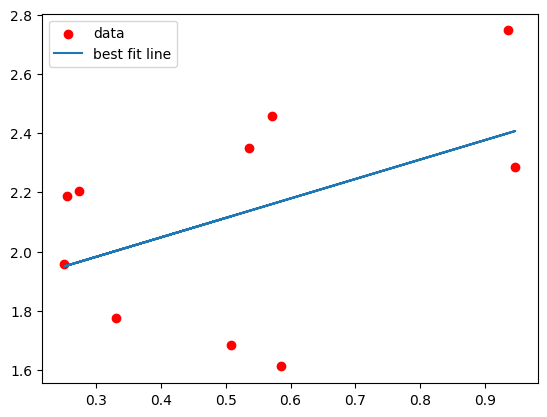

In [2]:
plt.scatter(X[:,1],y,c='r',label="data")
plt.plot(X[:,1],y_hat,label="best fit line")
plt.legend()

`scikit-learn` also has a class for ridge regression called [`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). When declaring an instance of this class, you use an additional parameter, `alpha`, which is equivalent to how we used $\lambda$ above. Here's what that looks like:

[[1.57556791 0.75747263]]


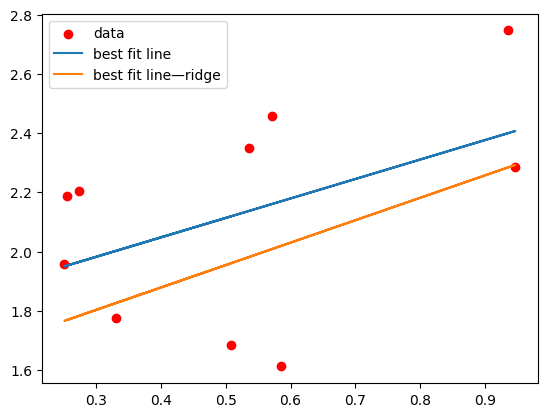

In [3]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1, fit_intercept=False)
ridge_model.fit(X,y)
print(ridge_model.coef_)
y_hat_ridge = np.matmul(X,np.reshape(ridge_model.coef_,(2,1)))
plt.scatter(X[:,1],y,c='r',label="data")
plt.plot(X[:,1],y_hat, label="best fit line")
plt.plot(X[:,1],y_hat_ridge,label="best fit line—ridge")
plt.legend()

What happens if we make `alpha` really huge?

[[0.18852668 0.10122048]]


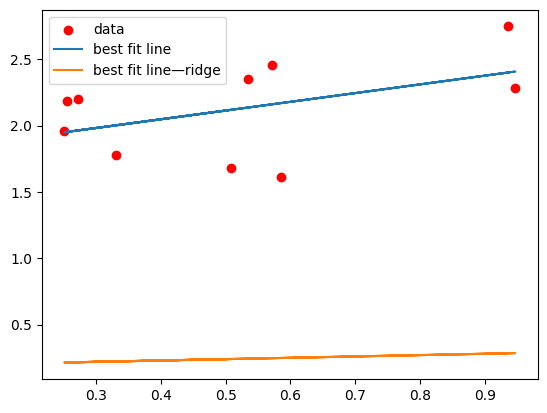

In [4]:
ridge_model = Ridge(alpha=100, fit_intercept=False)
ridge_model.fit(X,y)
print(ridge_model.coef_)
y_hat_ridge = np.matmul(X,np.reshape(ridge_model.coef_,(2,1)))
plt.scatter(X[:,1],y,c='r',label="data")
plt.plot(X[:,1],y_hat, label="best fit line")
plt.plot(X[:,1],y_hat_ridge,label="best fit line—ridge")
plt.legend()

And if we set it to 0?

[[1.78513081 0.65728992]]


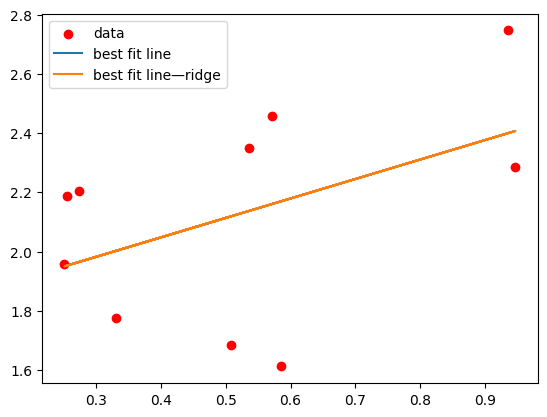

In [5]:
ridge_model = Ridge(alpha=0, fit_intercept=False)
ridge_model.fit(X,y)
print(ridge_model.coef_)
y_hat_ridge = np.matmul(X,np.reshape(ridge_model.coef_,(2,1)))
plt.scatter(X[:,1],y,c='r',label="data")
plt.plot(X[:,1],y_hat, label="best fit line")
plt.plot(X[:,1],y_hat_ridge,label="best fit line—ridge")
plt.legend()

The way that our solution changes with `alpha` (or, equivalently, $\lambda$) should be clear from the way we wrote our loss function for ridge regression. If it isn't, take another look at {eq}`eq54`.

## Overfitting

We've seen how ridge regression works, and have discussed some potential benefits of using it. But how can we actually observe its benefits, concretely? And how do we know whether or not we should use it in a given situation?

To figure out when we should be using ridge regression, we need a way to figure out how good a job we actually did of fitting our data (the model's "goodness of fit"). A natural way to do this is to evaluate the sum of squared residuals for the fit model, since that's the thing we were trying to minimize in the first place. But in order to fairly compare situations where we have different amounts of data, we don't just want to take the *sum* of squared residuals—instead, we take their *mean*, and we obtain a quantity called the ***mean squared error***.
:::{math}
\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
:::

So let's compare the mean square errors of our vanilla linear regression fit and our ridge regression fit with $\lambda = 1$ to the data we've been working with.

In [6]:
def mse(y,yhat):
    return np.sum((y-yhat)**2)/np.size(yhat)

#ridge fit
ridge_model = Ridge(alpha=1, fit_intercept=False)
ridge_model.fit(X,y)
y_hat_ridge = np.matmul(X,np.reshape(ridge_model.coef_,(2,1)))
MSE_ridge = mse(y_hat_ridge,y)
print(f"MSE ridge = {MSE_ridge}")

#linear fit
model.fit(X,y)
y_hat = np.matmul(X,np.reshape(model.coef_,(2,1)))
MSE_linear = mse(y_hat,y)
print(f"MSE linear = {MSE_linear}")

MSE ridge = 0.11898487940935429
MSE linear = 0.09355538727057654


So, the linear model seems to do better. But this isn't a totally fair way of evaluating these models. We're calculating the MSE on data that the models have already seen, so of *course* the errors are quite low. But in the real world, we want to see how the models are going to do on data that they haven't seen—the entire point of training these models is so that they can make good predictions without guidance in the future. So what we really want to do is evaluate their performance on a [test set](mldata).

So let's generate some more data using the same process we used to generate the training set and see how the two models do.

In [7]:
X_test = np.random.rand(10,2)
X_test[:,0] = 1
y_test = np.random.rand(10,1) + np.matmul(X_test,np.array([[1],[1]]))

y_hat_ridge_test = np.matmul(X_test,np.reshape(ridge_model.coef_,(2,1)))
MSE_ridge_test = mse(y_hat_ridge_test,y_test)
print(f"MSE ridge test = {MSE_ridge_test}")

y_hat_test = np.matmul(X_test,np.reshape(model.coef_,(2,1)))
MSE_linear_test = mse(y_hat_test,y_test)
print(f"MSE linear test = {MSE_linear_test}")

MSE ridge test = 0.10045417695556084
MSE linear test = 0.06822184698835426


Wow, these errors are *substantially* higher—and that's a good sign! Our models haven't seen the test data, so they should do a bit worse on them. But we can see here that the ridge regression is still doing a bit worse than the linear regression. What's the point of doing ridge regression, then?

Remember, ridge regression is particularly helpful in cases where we have ***multicollinearity*** among our regressors, or when we have a large ratio of regressors to observations. Here, though, we only have two regressors—$\textbf{x}$, and the intercept. And the underlying process that generated those data is quite simple.
:::{admonition} Exercise 
:class: note
Go back to the [code](square) where we originally generated our $\textbf{x}$ and $\textbf{y}$ data. What's the underlying model that describes the true relationship between $\textbf{y}$ and $\textbf{x}$?
:::{admonition} Solution
:class: seealso, dropdown
Looking at the code, we can see that, to generate $\textbf{y}$, we multiplied our design matrix by the vector $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and then added some random noise. So the underlying model is
:::{math} \textbf{y} = 1 + \textbf{x} + \boldsymbol\epsilon
:::

So a linear model with two regressors, 1 and $\textbf{x}$, is exactly the right model for our data. It's no surprise, then, that a vanilla linear model does so well! In an important sense, it's the best model possible.

But what if we don't choose the best model possible? What if we add an extraneous regressor? To drive the point home, let's do something pretty silly—let's make $2\textbf{x}$ a regressor as well as $\textbf{x}.$ That's about as bad as you could do in terms of multicollinearity, so ridge regression should really show its value here.

In [8]:
X_silly = np.concatenate((X,X[:,1].reshape(-1,1)*2),axis=1) #stacking another row—2x—onto our design matrix
X_test_silly = np.concatenate((X_test,X_test[:,1].reshape(-1,1)*2),axis=1)

ridge_model.fit(X_silly,y)
y_hat_ridge = np.matmul(X_silly,np.reshape(ridge_model.coef_,(3,1)))
MSE_ridge = mse(y_hat_ridge,y)
print(f"MSE ridge = {MSE_ridge}")

y_hat_ridge_test = np.matmul(X_test_silly,np.reshape(ridge_model.coef_,(3,1)))
MSE_ridge_test = mse(y_hat_ridge_test,y_test)
print(f"MSE ridge test = {MSE_ridge_test}")

model.fit(X_silly,y)
y_hat = np.matmul(X_silly,np.reshape(model.coef_,(3,1)))
MSE_linear = mse(y_hat,y)
print(f"MSE linear = {MSE_linear}")

y_hat_test = np.matmul(X_test_silly,np.reshape(model.coef_,(3,1)))
MSE_linear_test = mse(y_hat_test,y_test)
print(f"MSE linear test = {MSE_linear_test}")

MSE ridge = 0.13827949383646537
MSE ridge test = 0.10512298396311023
MSE linear = 0.09355538727057655
MSE linear test = 0.06822184698835426


And look at that! While the linear model still does better on the training data, it does *worse* on the test data, which is what we really care about! When a model achieves a really good fit to training data but performs poorly on test data, that's called ***overfitting***. It *fits overly well* to the training data—specifically, the random noise in the training data—which compromises how well it can fit to the test data.

:::{admonition} Definition
:class: note
***Overfitting*** describes the scenario where a model with too many degrees of freedom—that is, too much flexibility—is allowed to fit to the random noise in a training set, which ultimately results in inferior performance on the test set.
:::

Let's look at one more example of overfitting to drive the point home. What happens when you try to fit a high-degree polynomial—something like $y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \cdots$—to linear data? Let's try it! Fortunately, our linear regression framework is powerful enough to accommodate that—we just have to generate a design matrix with not only $1$ and $\textbf{x}$ but also $\textbf{x}^2$, $\textbf{x}^3,$ etc. as columns. Let's try it!

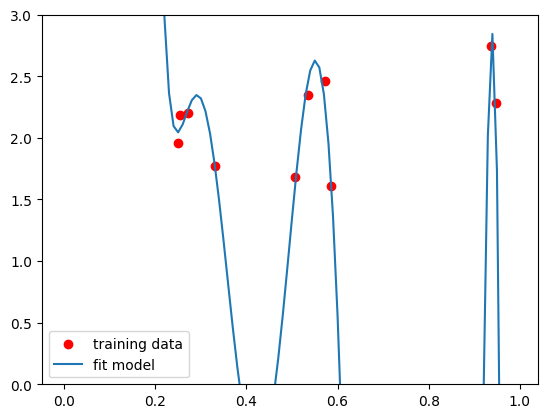

In [9]:
little_x = X[:,1].reshape(-1,1)
X_poly = np.concatenate((np.ones((10,1)),little_x,little_x**2, little_x**3, little_x**4,little_x**5,little_x**6,little_x**7), axis=1)

model.fit(X_poly,y)
X_axis = (np.arange(100)/100).reshape(-1,1) #this is just here to make the plotting look nice
X_axis_poly = np.concatenate((np.ones((100,1)),X_axis,X_axis**2, X_axis**3, X_axis**4,X_axis**5,X_axis**6,X_axis**7), axis=1)
y_hat = np.matmul(X_axis_poly,np.reshape(model.coef_,(8,1)))
plt.scatter(little_x,y,c="r",label="training data")
plt.plot(X_axis,y_hat,label="fit model")
plt.ylim((0,3))
plt.legend()

Well, that certainly doesn't look right. Let's see what happens when we plot the test data as well.

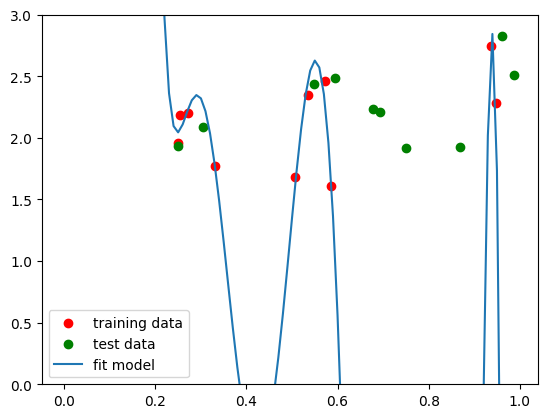

In [10]:
plt.scatter(little_x,y,c="r",label="training data")
plt.scatter(X_test[:,1],y_test,c="g",label="test data")
plt.plot(X_axis,y_hat,label="fit model")
plt.ylim((0,3))
plt.legend()

That looks like a pretty awful fit. One way to fix this issue is to just have tons more data:

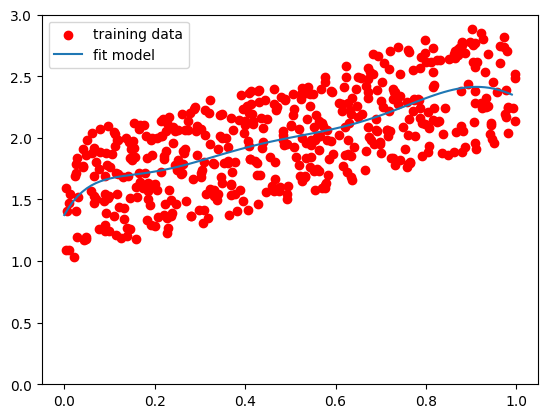

In [11]:
bigx = np.random.rand(500,1).reshape(-1,1)
bigx_poly = np.concatenate((np.ones((500,1)),bigx,bigx**2, bigx**3, bigx**4,bigx**5,bigx**6,bigx**7), axis=1)
bigy = np.random.rand(500,1) + np.matmul(bigx_poly[:,:2],np.array([[1],[1]]))
bigmodel = LinearRegression(fit_intercept=False)
bigmodel.fit(bigx_poly,bigy)
bigy_hat = np.matmul(X_axis_poly,np.reshape(bigmodel.coef_,(8,1)))
plt.scatter(bigx_poly[:,1],bigy,c="r",label="training data")
plt.plot(X_axis,bigy_hat,label="fit model")
plt.ylim((0,3))
plt.legend()

As long as you have substantially more data than features, you're going to be relatively safe from overfitting. But we won't always have as much data as we would like. So what happens if we follow exactly the same process, with all those extraneous polynomial regressors, but use ridge regression instead?

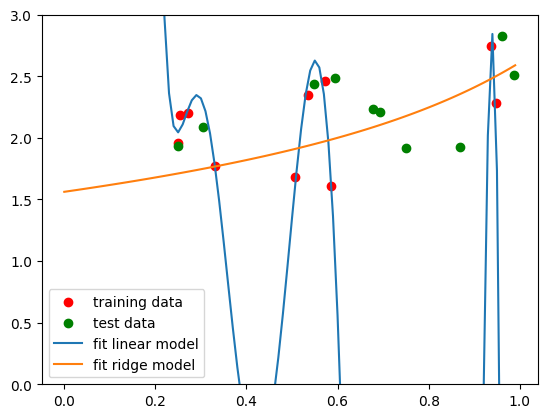

In [12]:
ridge_model.fit(X_poly,y)
y_hat_ridge = np.matmul(X_axis_poly,np.reshape(ridge_model.coef_,(8,1)))
plt.scatter(little_x,y,c="r",label="training data")
plt.scatter(X_test[:,1],y_test,c="g",label="test data")
plt.plot(X_axis,y_hat,label="fit linear model")
plt.plot(X_axis,y_hat_ridge,label="fit ridge model")
plt.ylim((0,3))
plt.legend()

And just to make sure our eyes aren't deceiving us, we can calculate the MSE on the test data for both the linear and the ridge fits.

In [13]:
little_x_test = X_test[:,1].reshape(-1,1)
X_test_poly = np.concatenate((np.ones((10,1)),little_x_test,little_x_test**2, little_x_test**3, little_x_test**4,little_x_test**5,little_x_test**6,little_x_test**7), axis=1)

y_hat_test = np.matmul(X_test_poly,np.reshape(model.coef_,(8,1)))
MSE_linear_test = mse(y_hat_test,y_test)
print(f"MSE linear test = {MSE_linear_test}")

y_hat_test_ridge = np.matmul(X_test_poly,np.reshape(ridge_model.coef_,(8,1)))
MSE_ridge_test = mse(y_hat_test_ridge,y_test)
print(f"MSE ridge test = {MSE_ridge_test}")

MSE linear test = 340.15951819217725
MSE ridge test = 0.10202595990551958


Regularization is a great way to prevent overfitting. So is using a simple model in the first place. In both cases, you are limiting your degrees of freedom—by not using that many degrees of freedom to start out with, or by adding additional constraints to a model with lots of degrees of freedom. The moral of the overfitting story is this:

***If your model has more degrees of freedom than the underlying process that produced the data, you are probably going to overfit to your data.***

So don't just go throwing deep neural networks at your datasets. In machine learning, it is essential to always start *as simple as possible*, and then only use more complex models if there's a good reason to.

But how do you know whether or not you need more degrees of freedom? You could just fit a ton of different models to your training data, and then see which does best on the test data. But then you'd be overfitting to the test data! Maybe the specific value of $\lambda$ you chose for your ridge regression works great for the test data you happen to have access to, but it might not work nearly as well out there in the real world.

It is ***absolutely essential*** that you don't touch your test set until the very end of the modeling process, once you have your model completely set in stone. Otherwise, your test data might be affecting your choice of model, and then the performance of that model on your test data is pretty much meaningless. (You may also hear this sort of test data referred to as ***held-out data***, because you are holding it out from the rest of the dataset while you do all of your preliminary testing.)

:::{warning}
***Never*** touch your held-out data until you are 100% certain that you are done modifying your model. Lots of bad machine learning research has made it into the literature because people tuned their models to their held-out data. Don't let that happen to you.
:::

But you need to have some basis for selecting the model that you ultimately end up with. Otherwise, you're basically just guessing. One option might be to pull a mini test set out of your training set, so that you can test different models on that mini set to find the best possibility to then try on your held-out data. And that's effectively the approach that we're going to take.

There's a catch, however—once we've pulled out the held-out data, and then also selected a mini test set to use for model selection, our training set might be kind of small. And that could affect model performance. Fortunately, there's a strategy called ***cross-validation*** that we can use to mitigate that possibility.

### Cross-validation

Cross-validation is used for two major purposes—choosing a model class (e.g. linear regression vs. deep neural network), and fixing specific features of that model class called ***hyperparameters***.
:::{admonition} Definition
:class: note
The ***hyperparameters*** of a model are the variables in the model that we are free to choose—but which we have to fix to a specific value before fitting.
:::
Even if, based on our knowledge of the problem, we have already selected some model class—say, ridge regression—we still probably have hyperparameters that we need to fix. In the case of ridge regression, we have to choose a value for the hyperparameter $\lambda.$ And rather than choosing $\lambda$ randomly, we can do it in a strategic, intentional way using cross-validation.

:::{admonition} Exercise 
:class: note
What are some of the hyperparameters of a deep neural network?
:::{admonition} Solution
:class: seealso, dropdown
Any parameters that dictate the architecture of the network count as hyperparameters. A few examples are the number of layers, the number of neurons per layer, and the number of inputs each neuron receives from the previous layer.
:::

The goal with cross-validation is to use that same training set/test set structure we're familiar with to test different choices of hyperparameter *within* our training set (while leaving the held-out data untouched). But the great thing about dealing with our training set is that we can do whatever we want with it. We don't have to leave any parts of it pristine—we can train and test on whatever parts of the data we want, as long as they give us a good idea of what is likely to work on our held-out data. 

So instead of splitting up our training set into a single mini training set and mini test set to see what hyperparameters work best, we'll do that split tons of different times, and then average the results. That's cross-validation. Typically, we will split our training set into $n$ different portions, called ***folds***, train on $n-1$ of the folds, and then test on the last fold. Then we'll repeat that process $n$ times, testing on every fold. The figure below shows what that looks like with five folds:

```{figure} ./figs/cv.png
---
height: 400px
---
```

This process is known as ***k-fold cross-validation***. If the number of folds is the same as the number of samples—that is, if you have, say, 10 data points in your training set and split it up into 10 folds, so every fold has one data point in it—that's called ***leave-one-out (LOO) cross-validation***. Different cross-validation strategies have different benefits and costs, which are beyond the scope of this class. But 10 is a pretty typical number of folds to use.

So, let's see how it works! You can always code up cross-validation manually, but `scikit-learn` has some very useful tools. In particular, [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) is a very quick and easy way to perform cross-validation. So let's use cross-validation to find the optimal value of $\lambda$ for ridge regression!

First, let's try to perform cross validation using a specific value—$\lambda = 1.$

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names
ridge_model = Ridge(alpha=1, fit_intercept=False)
folds = 5
print(cross_val_score(ridge_model,X_poly,y,cv=folds,scoring='neg_mean_squared_error')) 

[-0.3063105  -0.15565716 -0.04388598 -0.19752426 -0.32435703]


:::{warning}
If you use `scikit-learn` for cross-validation like this and want to get the results of your fit as the mean squared error, you have to write `scoring='neg_mean_squared_error'` when you call `cross_val_score`. What you will get back is the *negative* mean squared error for each fold. But no matter—just multiply the scores by -1 to get the true mean squared error!
:::

I've written a loop below that tests a bunch of possible values of $\lambda$ and tells us which one did best with the cross-validation:

In [15]:
lambdas = np.arange(20)/20
folds = 5
lowest_mse = 1
for lamb in lambdas: #'lambda' is a reserved keyword in python, so you can't use it as a variable name
    ridge_model = Ridge(alpha=lamb, fit_intercept=False)
    meansqerr = -np.average(cross_val_score(ridge_model,X_poly,y,cv=folds,scoring='neg_mean_squared_error'))
    if meansqerr < lowest_mse:
        lowest_mse = meansqerr
        best_lamb = lamb
print(best_lamb)

0.2


/Users/gracehuckins/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01103e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/gracehuckins/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.43114e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Alright, we've found our optimal $\lambda$ with cross-validation! Let's see how it works. We'll compare the fit on our test data to the fit where $\lambda = 1$, which you should normally ***never do***—remember, we never want to be testing anything on our held-out data—but this is for didacting purposes here, to show that the cross-validation actually worked.

MSE ridge, lambda=0.2 = 0.07168218424093994
MSE ridge, lambda=1 = 0.10202595990551958


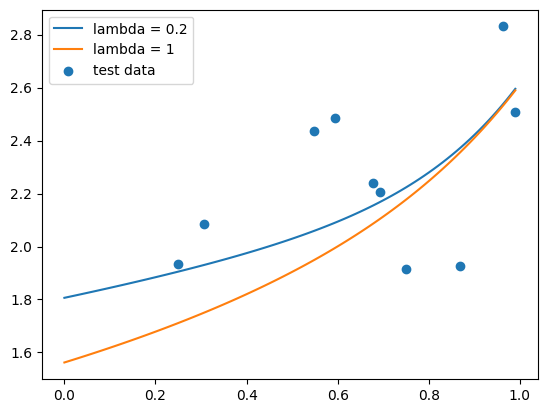

In [16]:
ridge_model = Ridge(alpha=best_lamb, fit_intercept=False)
ridge_model.fit(X_poly,y)
y_hat_ridge = np.matmul(X_axis_poly,np.reshape(ridge_model.coef_,(8,1)))
ridge_model_1 = Ridge(alpha=1, fit_intercept=False)
ridge_model_1.fit(X_poly,y)
y_hat_ridge_1 = np.matmul(X_axis_poly,np.reshape(ridge_model_1.coef_,(8,1)))
plt.plot(X_axis, y_hat_ridge,label=f"lambda = {best_lamb}")
plt.plot(X_axis, y_hat_ridge_1,label="lambda = 1")
plt.scatter(X_test[:,1],y_test,label="test data")
plt.legend()

y_hat_ridge_test = np.matmul(X_test_poly,np.reshape(ridge_model.coef_,(8,1)))
MSE_ridge = mse(y_hat_ridge_test,y_test)
print(f"MSE ridge, lambda={best_lamb} = {MSE_ridge}")

y_hat_ridge_1_test = np.matmul(X_test_poly,np.reshape(ridge_model_1.coef_,(8,1)))
MSE_ridge_1 = mse(y_hat_ridge_1_test,y_test)
print(f"MSE ridge, lambda=1 = {MSE_ridge_1}")

Cross-validation is truly and bread-and-butter machine learning technique—if you do more machine learning in the future, or if you use machine learning on your final project, you will use it all the time. Remember, whenever you are applying machine learning to a problem, you should *always* follow this pipeline to prevent overfitting:
:::{admonition} Machine Learning Pipeline
:class: important
1. Take your full dataset, and divide it into a training set and a test set. Then, store the test set elsewhere—like a separate folder—so you aren't tempted to touch it.
2. Evaluate your training data. Plot them, if that makes sense for the data you have. What sort of model might work here? The simpler the model, the better.
3. If you have a lot of features and/or not much data, consider using a regularized approach like ridge regression.
4. Define the space of models you'll be considering. Figure out what decisions you need to make, and what hyperparameters you have to fix. The fewer decisions, the better.
5. Use cross-validation to make those decisions and fix your hyperparameters.
6. Once every feature of your model is set in stone, then you can finally test it on you held-out data. 
:::

## Logistic Regression

With just the tools we've learned so far, you can tackle a huge number of machine learning problems. Yes, linear regression is a relatively simple approach—but remember, when it comes to machine learning, you want to use the simplest possible tool for the problem at hand.

But regression problems like the ones we've seen so far are really only half of what machine learning's about. Linear regression allows us to map continuous features to continuous outputs. But let's say you have a bunch of neuron recordings, and you want to train a model to identify which recordings come from excitatory neurons and which ones come from inhibitory neurons. Your outcome variable in that case—excitatory vs. inhibitory—isn't continuous anymore. It's categorical. And so regression isn't quite the right tool for the problem at hand.

In theory, we could jury-rig linear regression to do this job for us. It's not hard to transform a continuous outcome variable—say, a variable that ranges from 0 to 10—into a categorical variable. Just set a threshold at 5, call everything below the threshold "0", and everything above it "1".

We can do better than that, though. In general, we don't just want to get a 1 or 0 out of our classification model. It's far more informative if we can train a model to tell us *how likely* a given observation is to belong to each category.

So it seems like we have a linear regression problem again. Probability, after all, is a continuous variable. But it's a special type of continuous variable—it can only take on values between 0 and 1. But there's no way to restrict our linear regression equation, $\textbf{y} = \textbf{X}\boldsymbol\beta$, to exclusively output $y$ values within that range.

That's where the ***logistic*** (or ***sigmoid***) function comes in. It's defined as 
:::{math}
f(x) = \frac{1}{1 + e^{-x}}
:::
Here's what that looks like:

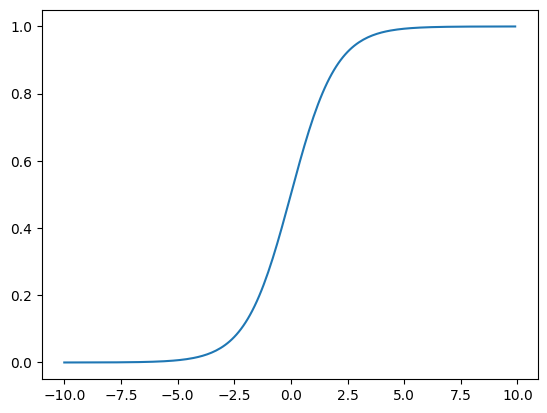

In [17]:
x = np.arange(-10,10,.1)
y = 1/(1 + np.exp(-x))
plt.plot(x,y)

So all of the $y$ values are between 0 and 1. That means we can use the below modification of linear regression:
:::{math}
\textbf{y} = \frac{1}{1 + e^{-\textbf{X}\boldsymbol\beta}}
:::
to give us probabilities. Here, by feeding $\textbf{X}\boldsymbol\beta$ into the logistic function, I mean that we should apply the logistic function to every element of $\textbf{X}\boldsymbol\beta$ individually. Then, to classify our data based on those probabilities, we can send everything with a probability $\ge 0.5$ to 1 and anything with a probability $<0.5$ to 0.

So we have a ***model*** that we can use for classification! But what about our ***loss function***? 

### Log Likelihood
Here's one way we could design our loss function (where $n$ is our total number of observations):
:::{math}
\text{loss}(\boldsymbol\beta) &= -\sum_{i=1}^n k_i\\
k_i &=  \left\{ \begin{array}\\
      1 & \mbox{if } y_i = 1 \text{ and } \frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}} \ge 0.5\\ 
      1 & \mbox{if } y_i = 0 \text{ and } \frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}} < 0.5\\ 
      0 & \mbox{otherwise }
  \end{array}
    \right.
:::
where $\textbf{x}_i$ is the vector of feature values associated with the $i$<sup>th</sup> observation. What this function tells us to do is to go through every data point, assign it a score of 1 if we predicted the correct label for it, and assign a score of 0 otherwise. Then, we add up the scores for every data point, and we try to maximize that score (or, equivalently, minimize its opposite).

But we've lost something important in designing this loss function—there's no room for those probabilities we talked about. Shouldn't we assign a higher score to a probability of 0.9 than a probability of 0.6, if the true value of the outcome variable is 1? 

If we focus on the probabilities, we can implement a very sensible type of loss function, called a "likelihood function." The likelihood function is designed to answer the question, "What's the probability of observing our data, given our model?" If we have one data point whose true label is 1, and our model yields a score of 0.7, then the likelihood of that observation is 0.7. If instead the true label is 0, the likelihood if the observation is 0.3—that is, 1 - 0.7.

:::{admonition} Definition
:class: note
The ***likelihood*** of a set of data under a particular model is the probability of observing those data, assuming that the model is true.
:::

It's really easy to extend likelihood to multiple observations. In general, to find the probability that several events all happen—say, that it rains both today and tomorrow—you multiply the individual probabilities for those events. So to find the probability of observing all of our data, we multiply the probabilities of the individual observations under our model. Here's what that looks like:

:::{math}
L(\boldsymbol\beta) &= \prod_{i=1}^n k_i\\
k_i &=  \left\{ \begin{array}\\
      \frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}} & \mbox{if } y_i = 1 \\ 
      1 - \frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}}  & \mbox{if } y_i = 0 
  \end{array}
    \right.
:::

:::{admonition} Pi Notation
:class: note, dropdown
Pi notation, which you see in the above example, is for multiplication what sigma notation is for addition.
:::{math}
\sum_{i=1}^5 x_i &= x_1 + x_2 + x_3 + x_4 + x_5\\
\prod_{i=1}^5 x_i &= x_1 \times x_2 \times x_3 \times x_4 \times x_5
:::

The only issue we have here is that big products like this get really messy, mathematically speaking. But there's a trick we can use to make things simpler. Remember, we only really care about the likelihood so that we can eventually find the $\boldsymbol\beta$ that maximizes it. So we can apply any ***monotonically increasing*** function $y = f(x)$—that is, any function for which $x_i > x_j$ if and only if $f(x_i) > f(x_j)$—to the likelihood, and the result will still be maximized at that same $\boldsymbol\beta.$

For example, we could multiply our likelihood by 2, and it would still be maximized at the same value of $\boldsymbol\beta.$ Or, somewhat more usefully, we could take the ***natural logarithm*** of the likelihood, since the logarithm is a monotonically increasing function. Why would we want to do that? Well, $\ln(a\times b) = \ln(a) + \ln(b)$—logs turn products into sums. So:

:::{math}
\ln(L(\boldsymbol\beta)) &= \sum_{i=1}^n k_i\\
k_i &=  \left\{ \begin{array}\\
      \ln\left(\frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}}\right) & \mbox{if } y_i = 1 \\ 
      \ln\left(1 - \frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}}\right)  & \mbox{if } y_i = 0 
  \end{array}
    \right.
:::

This expression is called the ***log likelihood***, which we will write as $LL(\boldsymbol\beta).$  And it turns out that using the log likehood allows us to simplify things extensively:

:::{math}
LL(\boldsymbol\beta) &= \sum_{i=1}^n \ln\left( y_i \frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}} + (1 - y_i)\left(1 - \frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}}\right)\right)\\
&= \sum_{i=1}^n \ln\left(y_i \frac{1}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}} + (1 - y_i)\frac{e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}}\right)\\
&= \sum_{i=1}^n \ln\left(\frac{(1 - e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta})y_i + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}}{1 + e^{-\textbf{x}_i^{\intercal}\boldsymbol\beta}}\right)\\
&= \sum_{i=1}^n \ln\left(\frac{1 + (e^{\textbf{x}_i^{\intercal}\boldsymbol\beta} - 1)y_i}{1 + e^{\textbf{x}_i^{\intercal}\boldsymbol\beta}}\right)\\
&= \sum_{i=1}^n \ln\left(1 + (e^{\textbf{x}_i^{\intercal}\boldsymbol\beta} - 1)y_i\right) - \ln\left(1 + e^{\textbf{x}_i^{\intercal}\boldsymbol\beta}\right)
:::

The log likelihood is the function that we try to maximize in logistic regression. And since loss functions are all about minimizing, we set our loss function to be the ***negative log likelihood***. In fact, negative log likelihood is used as a loss function for all sorts of different models, and you are likely to see it many, many times in your computational career.

:::{tip}
You can also regularize logistic regression, just like we did for linear regression! If we add the ridge regularization to our negative log likelihood, for example, our loss function will look like this:
:::{math}
\text{loss}(\boldsymbol\beta) = \lambda \boldsymbol\beta^{\intercal}\boldsymbol\beta - \sum_{i=1}^n \ln\left(1 + (e^{\textbf{x}_i^{\intercal}\boldsymbol\beta} - 1)y_i\right) - \ln\left(1 + e^{\textbf{x}_i^{\intercal}\boldsymbol\beta}\right)
:::

But there's a problem with the negative log likelihood for logistic regression: We can't differentiate it with respect to $\boldsymbol\beta$, like we did with the loss functions for linear and ridge regression. Fortunately, there's a different approach we can take—an extremely powerful approach that is used to minimize functions for countless mathematical applications. It's sometimes even used to minimize the loss function for linear regression, when the size of $\textbf{X}$ makes taking the inverse of $\textbf{X}^{\intercal}\textbf{X}$ too expensive.

That approach is called ***gradient descent***.

### Gradient Descent

Imagine you're climbing a mountain when a thick fog descends—so dense that you can only see a few feet in front of you. You become disoriented, and you have no idea how to get down to the bottom of the valley below you. How do you get off of the mountain? Well, you could look at the area you can see around you, and follow the steepest downward path that you can see. 

That's essentially how gradient descent works. When we can't just find the minimum of a function by taking its derivative, we start somewhere on its landscape and then follow the steepest path downward. It's an iterative process that involves taking sequential downard steps until we find ourselves at the function's minimum.

But how do we figure out what that steepest path is? We just have to use the mathematical tool that gives us the steepness, or slope, of the function–it's derivative. Since the derivative points up the slope of a function, we want to move in the opposite direction of the derivative at every iteration. 

Here's what that looks like mathematically when we have one regressor, if our loss function is $f(\beta)$:
:::{math}
:label: gd
\beta^{n+1} = \beta^{n} - \alpha \frac{\text{d}}{\text{d} \beta} f(\beta^n)
:::
where $\beta^i$ is our $\beta$ value at the $i$<sup>th</sup> iteration of the gradient descent. $\alpha$ is just a parameter that determines the size of the "steps" we take down our loss function. Generally, you want $\alpha$ to be fairly small, because you might miss the minimum entirely if your steps are too big. But if $\alpha$ is too small, then gradient descent will take a very long time.

The really great thing about gradient descent is that it helps us home in on the minimum very precisely. When we are close to the minimum, our derivative is near 0, so $\alpha \frac{\text{d}}{\text{d} \beta}f(\beta^n)$ is very small. That means we move quite slowly and carefully—if everything goes well, we won't miss the minimum. And at the minimum, the derivative *is* 0, so $\beta^{n+1} = \beta^n.$ Once we've found the minimum, we stay there.

Let's visualize what this looks like with the example of a parabolic loss function:


```{figure} ./figs/gdfig1.png
---
height: 300px
---
```

If we have an expression for the derivative of the loss function, we can just use the same approach we used for linear regression: set the derivative to 0 to find the minimum.

```{figure} ./figs/gdfig2.png
---
height: 300px
---
```

But let's assume we can't do that. Often, we may be in situations where we can't find a global expression for the derivative of some function—but we can evaluate the derivative locally. In such cases, we can start at a random spot along our function and effectively follow along the derivative, evaluated locally, to reach our minimum. This is an *iterative* process, which means we repeat a process over and over again until we reach our goal (the minimum). You can think of the iterative process of gradient descent as taking steps down a hill, in the steepest direction, to reach a valley as fast as possible.

Let's see how that works in practice. We start at some random point along our parabola. We can find our derivative at that point:

```{figure} ./figs/gdfig3.png
---
height: 300px
---
```

Since we are on the left arm of the parabola, our derivative is going to be negative, numerically speaking. But we need to move to the right to get closer to our minimum. So we will subtract our derivative, times some constant, from our $x$ coordinate to move in the proper direction:

```{figure} ./figs/gdfig4.png
---
height: 300px
---
```

Now we are at a new point. Again, we find the derivative at that point, multiply it by some constant, and subtract it from our $x$ coordinate:

```{figure} ./figs/gdfig5.png
---
height: 300px
---
```

And we can continue doing this until we reach our minimum. The closer we get to our minimum, the closer the derivative will get to 0. So as we get nearer to our goal, we will move less with each step, which is a good thing—we are getting more careful as we are getting closer. If we continue for enough iterations, we should be about right at our minimum by the time the algorithm terminates.


```{figure} ./figs/gdfig6.png
---
height: 300px
---
```

It's important to note, though, that gradient descent is not foolproof. If we are using it to find the minimum of a more complex function, we could risk getting stuck in a local minimum:

```{figure} ./figs/gdfig7.png
---
height: 400px
---
```
There are a couple of ways to avoid this. One is to make clever initial guesses, where you can be pretty confident that you're near your function's global minimum to start out with. Another is to adjust $\alpha$ over the course of learning, so that you make very big steps at first and smaller steps later on.

The great thing about gradient descent is that it doesn't just work for univariate functions, like parabolas. It works for multivariate functions, too. And gradient descent is an even more useful technique in those cases—because, unlike with a univariate function, there are tons of different directions you could possibly move in (versus just "left" and "right). Gradient descent helps us make sure we're moving in the optimal direction down a multivariate function, as you can see in the example of a path that gradient descent might follow down a function of two variables below:

```{figure} ./figs/3dgraddescent.jpeg
---
height: 300px
---
```

As we've done before, let's work out multivariate gradient descent with scalar equations, and then combine them. Let's say we have three regressors, $\textbf{x}_1,$ $\textbf{x}_2,$ and $\textbf{x}_3,$ and associated coefficients $\beta_1,$ $\beta_2,$ and $\beta_3.$ Our update equations for each $\beta$ will be exactly the same as {eq}`gd`, except we will have to use partial derivatives, since we'll have a multivariate loss function $F(\boldsymbol\beta)$: 
:::{math}
\beta_1^{n+1} &= \beta_1^n - \alpha \frac{\partial}{\partial \beta_1}F(\boldsymbol\beta^n)\\
\beta_2^{n+1} &= \beta_2^n - \alpha \frac{\partial}{\partial \beta_2}F(\boldsymbol\beta^n)\\
\beta_2^{n+1} &= \beta_2^n - \alpha \frac{\partial}{\partial \beta_2}F(\boldsymbol\beta^n)
:::
To turn these scalar equations into a single vector equation, we need a new tool that we haven't used before: the vector version of the derivative. For any vector-valued function (that is, a function that takes a vector as the input), you can evaluated the ***gradient***, $\nabla$, which is just a vector of all its partial derivatives. In this case:
:::{math}
\nabla F(\boldsymbol\beta) &= \begin{bmatrix} \frac{\partial}{\partial \beta_1}F(\boldsymbol\beta) \\ \frac{\partial}{\partial \beta_2}F(\boldsymbol\beta) \\ \frac{\partial}{\partial \beta_3}F(\boldsymbol\beta) \end{bmatrix}
:::
:::{admonition} Definition
:class: note
The ***gradient*** of a vector-valued function is a vector of its partial derivatives, in the directions of each vector element.
:::
So, our gradient descent update equation for vector-valued functions is simply
:::{math}
\boldsymbol\beta^{n+1} = \boldsymbol\beta^n - \alpha \nabla F(\boldsymbol\beta^n)
:::
On this week's problem set, you will implement gradient descent yourself in Python to solve a regression problem.